# Import libraries and load datasets

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv('owid-co2-data.csv', delimiter=';')
dataset_codebook=pd.read_csv('owid-co2-codebook.csv', delimiter=';')

C:\Users\wangj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.0,0.07,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.0,0.015,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


# Variables and units

In [4]:
# Get df shape
row, col = dataset.shape
print("Number of rows: " + str(row))
print("Number of columns: " + str(col))

Number of rows: 24016
Number of columns: 38


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24016 entries, 0 to 24015
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   iso_code                     19417 non-null  object 
 1   country                      24016 non-null  object 
 2   year                         24016 non-null  int64  
 3   co2                          23372 non-null  object 
 4   co2_growth_prct              21662 non-null  object 
 5   co2_growth_abs               23116 non-null  object 
 6   consumption_co2              3532 non-null   object 
 7   trade_co2                    3531 non-null   object 
 8   trade_co2_share              3531 non-null   float64
 9   co2_per_capita               20531 non-null  float64
 10  consumption_co2_per_capita   3332 non-null   float64
 11  share_global_co2             23372 non-null  float64
 12  cumulative_co2               23372 non-null  object 
 13  share_global_cum

In [6]:
dataset_codebook.head(55)

,column,description,source
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes,International Organization for Standardization
1,country,Geographic location,Our World in Data
2,year,Year of observation,Our World in Data
3,co2,Annual production-based emissions of carbon di...,Global Carbon Project
4,co2_growth_prct,Percentage change in CO2 emissions from one ye...,Calculated by Our World in Data based on the G...
5,co2_growth_abs,Annual change in CO2 emissions from one year r...,Calculated by Our World in Data based on the G...
6,consumption_co2,"Annual consumption-based CO2 emissions, measur...",Global Carbon Project
7,trade_co2,Net CO2 emissions embedded in trade,NaN
8,trade_co2_share,"CO2 emissions embedded in trade, given as a pe...",Calculated by Our World in Data based on Globa...
9,co2_per_capita,"Average per capita CO2 emissions, measured in ...",Calculated by Our World in Data based on the G...


# Temporal coverage

In [7]:
#Temporal coverage: Number of considered years
start_year = dataset['year'].min()
end_year = dataset['year'].max()

print(f'The dataset covers the period [{start_year} - {end_year}].')

The dataset covers the period [1751 - 2018].


In [8]:
# Count number of values available per year
by_year = dataset.groupby(by = 'year').count()

In [9]:
# Spatial coverage: Number of countries
n_countries = dataset["country"].nunique()
n_countries

252

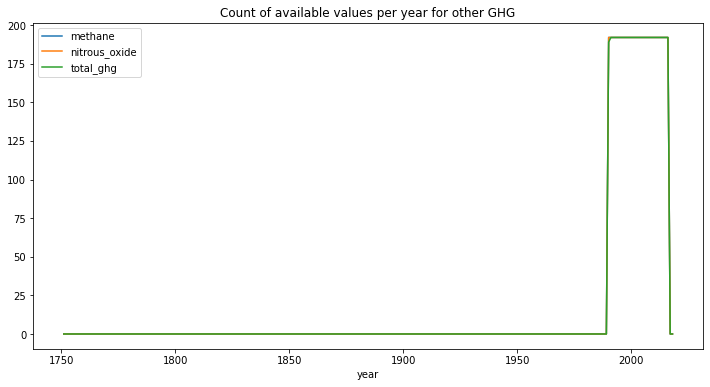

In [10]:
by_year[['methane', 'nitrous_oxide', 'total_ghg']].plot(figsize=(12,6),
    title = 'Count of available values per year for other GHG');

# Missing data

Dealing with missing data/value is one of the most tricky but common parts of data cleaning. 
We divide the heatmap into two parts that we can visualize the missing data.

<AxesSubplot:>

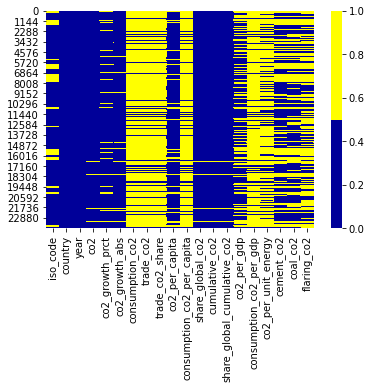

In [11]:
cols = dataset.columns[0:20] # From column 1 to 19
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

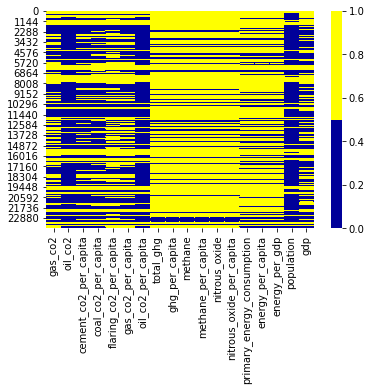

In [12]:
cols = dataset.columns[20:38] # From column 1 to 20
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

In [13]:
#checking for missing values of each variable
dataset.isnull().sum()

iso_code                        4599
country                            0
year                               0
co2                              644
co2_growth_prct                 2354
co2_growth_abs                   900
consumption_co2                20484
trade_co2                      20485
trade_co2_share                20485
co2_per_capita                  3485
consumption_co2_per_capita     20684
share_global_co2                 644
cumulative_co2                   644
share_global_cumulative_co2      644
co2_per_gdp                     9067
consumption_co2_per_gdp        20833
co2_per_unit_energy            17246
cement_co2                      9655
coal_co2                       10786
flaring_co2                    14228
gas_co2                        12022
oil_co2                         5946
cement_co2_per_capita           9655
coal_co2_per_capita            10786
flaring_co2_per_capita         14228
gas_co2_per_capita             12022
oil_co2_per_capita              5946
t

We create a list below showing the percentage of missing values for each of the features.This list is a useful summary that can complement the heatmap visualization.

In [14]:
# % of rows missing in each column
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

iso_code - 19.0%
country - 0.0%
year - 0.0%
co2 - 3.0%
co2_growth_prct - 10.0%
co2_growth_abs - 4.0%
consumption_co2 - 85.0%
trade_co2 - 85.0%
trade_co2_share - 85.0%
co2_per_capita - 15.0%
consumption_co2_per_capita - 86.0%
share_global_co2 - 3.0%
cumulative_co2 - 3.0%
share_global_cumulative_co2 - 3.0%
co2_per_gdp - 38.0%
consumption_co2_per_gdp - 87.0%
co2_per_unit_energy - 72.0%
cement_co2 - 40.0%
coal_co2 - 45.0%
flaring_co2 - 59.0%
gas_co2 - 50.0%
oil_co2 - 25.0%
cement_co2_per_capita - 40.0%
coal_co2_per_capita - 45.0%
flaring_co2_per_capita - 59.0%
gas_co2_per_capita - 50.0%
oil_co2_per_capita - 25.0%
total_ghg - 78.0%
ghg_per_capita - 79.0%
methane - 78.0%
methane_per_capita - 79.0%
nitrous_oxide - 78.0%
nitrous_oxide_per_capita - 79.0%
primary_energy_consumption - 75.0%
energy_per_capita - 75.0%
energy_per_gdp - 75.0%
population - 19.0%
gdp - 45.0%


# Extract the outliers - boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<AxesSubplot:>

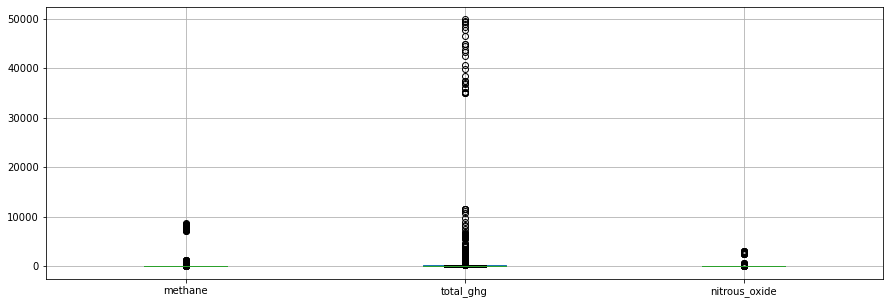

In [15]:
# First verson: boxplot 
draft=dataset.select_dtypes(include=['float'])
draft[['methane','total_ghg','nitrous_oxide']].boxplot(figsize=(15,5))

In [16]:
draft.head()

,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,flaring_co2,cement_co2_per_capita,...,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,energy_per_gdp,population,gdp
0,NaN,0.0,NaN,0.000,0.0,NaN,NaN,NaN,0.0,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,NaN,0.0,NaN,0.001,0.0,0.0,NaN,NaN,0.0,0.0,...,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,NaN,0.0,NaN,0.001,0.0,0.0,NaN,NaN,0.0,0.0,...,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,NaN,0.0,NaN,0.001,0.0,0.0,NaN,NaN,0.0,0.0,...,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,NaN,0.0,NaN,0.002,0.0,0.0,NaN,NaN,0.0,0.0,...,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


We will determine an upper limit, we consider the 95% of the data. Beyond this limit, the data will be considered as outliers.

In [17]:
upper_lim=dataset['methane'].quantile(.95)
df_outliers=dataset[dataset['methane']>upper_lim]
df_outliers['methane']

921       130.69
922       134.43
924       132.85
925       131.63
926       132.83
          ...   
23656    8374.14
23657    8339.46
23658    8477.25
23659    8660.01
23660    8550.06
Name: methane, Length: 260, dtype: float64

In [18]:
upper_lim=dataset['nitrous_oxide'].quantile(.95)
df_outliers=dataset[dataset['nitrous_oxide']>upper_lim]
df_outliers['nitrous_oxide']

1732       82.27
1733       81.35
1734       80.52
1735       80.33
1736       80.19
          ...   
23656    2970.41
23657    2941.00
23658    2999.32
23659    3052.82
23660    3054.00
Name: nitrous_oxide, Length: 260, dtype: float64

In [19]:
upper_lim=dataset['total_ghg'].quantile(.95)
df_outliers=dataset[dataset['total_ghg']>upper_lim]
df_outliers['total_ghg']

3197      1496.21
3198      1523.47
3199      1533.44
3200      1543.62
3201      1559.95
           ...   
23656    48348.77
23657    48961.60
23658    49440.79
23659    49854.98
23660    49358.03
Name: total_ghg, Length: 259, dtype: float64

# Extract the outliers - z-score

Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean. Formula: Z score = (x -mean) / std. deviation. Here, we suppose if the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [20]:
#Second version : detect outliers using Z-score
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [21]:
#detect the values of methane considered as outliers
methane_out= detect_outliers(dataset['methane'])
print("They are \t", len(methane_out),"outliers in methane using z-score method.")

They are 	 27 outliers in methane using z-score method.


In [22]:
#detect the values of nitrous_oxide considered as outliers
nitrous_oxide_out= detect_outliers(dataset['nitrous_oxide'])
print("They are \t", len(nitrous_oxide_out),"outliers in nitrous_oxide using z-score method.")

They are 	 54 outliers in nitrous_oxide using z-score method.


In [23]:
#detect the values of nitrous_oxide considered as outliers
total_ghg_out= detect_outliers(dataset['total_ghg'])
print("They are \t", len(total_ghg_out),"outliers in total_ghg using z-score method.")

They are 	 88 outliers in total_ghg using z-score method.


# Unnecessary : Uninformative / Repetitive 

Sometimes one feature is uninformative because it has too many rows being the same value.
For that, we create a list of features with a high percentage of the same value. For example, we specify below to show features with over 95% rows being the same value. We woul look at the features after the variable "year", which are more meaningful, as we examine the values of each column.

In [24]:
num_rows = len(dataset.index)
low_information_cols = [] 


for col in dataset.columns:
    cnts = dataset[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
    print('{0}: {1:.5f}%'.format(col, top_pct*100))
    print(cnts)
    print()

iso_code: 19.14973%
NaN         4599
GBR          268
OWID_WRL     268
USA          268
CHN          266
            ... 
COG           60
CYM           59
ANT           26
CXR           14
PRI            1
Name: iso_code, Length: 224, dtype: int64

country: 1.11592%
Asia (excl. China & India)    268
United States                 268
Asia                          268
North America                 268
EU-27                         268
                             ... 
Zanzibar                       20
Christmas Island               14
French Equatorial Africa        9
Puerto Rico                     1
Kuwaiti Oil Fires               1
Name: country, Length: 252, dtype: int64

year: 1.02432%
1991    246
1987    245
1988    245
1989    245
1990    245
       ... 
1780     19
1764     19
1779     19
1763     19
1760     19
Name: year, Length: 268, dtype: int64

co2: 6.47901%
0.0        1556
NaN         644
0.004       297
0.011       181
0.048       137
           ... 
120.511       1
33.3

We can look into these variables one by one to see whether they are informative or not. We won’t show the details here.